In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error


In [2]:
df = pd.read_csv('local_weather.csv',index_col='DATE')

In [3]:
df

STATION                                  NAME  ACMH  ACSH  \
DATE                                                                        
1960-01-01  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   
1960-01-02  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   
1960-01-03  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   
1960-01-04  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   
1960-01-05  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   
...                 ...                                   ...   ...   ...   
2022-01-24  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   
2022-01-25  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   
2022-01-26  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   
2022-01-27  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   
2022-01-28  USW00023230  OAKLAND INTERNATIONAL AIRPORT, CA US   NaN   NaN   

            AWND  DAPR  FMTM  FRGT  MDPR    PGTM  ...  WT01  WT02  WT03  WT04  \
DATE                                              ...                           
1960-01-01   NaN   NaN   NaN   NaN   NaN     NaN  ...   NaN   NaN   NaN   NaN   
1960-01-02   NaN   NaN   NaN   NaN   NaN     NaN  ...   NaN   NaN   NaN   NaN   
1960-01-03   NaN   NaN   NaN   NaN   NaN     NaN  ...   NaN   NaN   NaN   NaN   
1960-01-04   NaN   NaN   NaN   NaN   NaN     NaN  ...   NaN   NaN   NaN   NaN   
1960-01-05   NaN   NaN   NaN   NaN   NaN     NaN  ...   1.0   NaN   NaN   NaN   
...          ...   ...   ...   ...   ...     ...  ...   ...   ...   ...   ...   
2022-01-24  4.47   NaN   NaN   NaN   NaN     NaN  ...   1.0   NaN   NaN   NaN   
2022-01-25  4.70   NaN   NaN   NaN   NaN     NaN  ...   1.0   NaN   NaN   NaN   
2022-01-26  2.68   NaN   NaN   NaN   NaN     NaN  ...   1.0   NaN   NaN   NaN   
2022-01-27  3.13   NaN   NaN   NaN   NaN  1526.0  ...   1.0   NaN   NaN   NaN   
2022-01-28   NaN   NaN   NaN   NaN   NaN     NaN  ...   NaN   NaN   NaN   NaN   

            WT05  WT07  WT08  WT09  WT16  WT18  
DATE                                            
1960-01-01   NaN   NaN   NaN   NaN   NaN   NaN  
1960-01-02   NaN   NaN   NaN   NaN   1.0   NaN  
1960-01-03   NaN   NaN   NaN   NaN   NaN   NaN  
1960-01-04   NaN   NaN   NaN   NaN   NaN   NaN  
1960-01-05   NaN   NaN   1.0   NaN   NaN   NaN  
...          ...   ...   ...   ...   ...   ...  
2022-01-24   NaN   NaN   1.0   NaN   NaN   NaN  
2022-01-25   NaN   NaN   1.0   NaN   NaN   NaN  
2022-01-26   NaN   NaN   1.0   NaN   NaN   NaN  
2022-01-27   NaN   NaN   NaN   NaN   NaN   NaN  
2022-01-28   NaN   NaN   NaN   NaN   NaN   NaN  

[16859 rows x 35 columns]

Find out Missing Values

In [4]:
missing_values = df.isnull().sum()

Percentage of missing values

In [5]:
missing_values/df.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.653360
ACSH       0.653360
AWND       0.522451
DAPR       0.999525
FMTM       0.870099
FRGT       0.999881
MDPR       0.999525
PGTM       0.495106
PRCP       0.016668
SNOW       0.324990
SNWD       0.317634
TAVG       0.879174
TMAX       0.000534
TMIN       0.000593
TSUN       0.931728
WDF1       0.653360
WDF2       0.522392
WDF5       0.527552
WDFG       0.746901
WSF1       0.653360
WSF2       0.522332
WSF5       0.527552
WSFG       0.746901
WT01       0.779939
WT02       0.980248
WT03       0.992941
WT04       0.999763
WT05       0.998339
WT07       0.999881
WT08       0.810368
WT09       0.999881
WT16       0.884038
WT18       0.999822
dtype: float64

The document lists the following columns as the core ones that need to be used for further analysis. To make things simpler, we modify the columns that are easy to identify.

In [6]:
core_weather = df[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]
core_weather

precip  snow  snow_depth  temp_max  temp_min
DATE                                                    
1960-01-01     0.0   0.0         0.0      49.0      30.0
1960-01-02     0.0   0.0         0.0      49.0      29.0
1960-01-03     0.0   0.0         0.0      54.0      35.0
1960-01-04     0.0   0.0         0.0      54.0      36.0
1960-01-05     0.0   0.0         0.0      55.0      33.0
...            ...   ...         ...       ...       ...
2022-01-24     0.0   NaN         NaN      60.0      39.0
2022-01-25     0.0   NaN         NaN      57.0      43.0
2022-01-26     0.0   NaN         NaN      57.0      41.0
2022-01-27     0.0   NaN         NaN      67.0      39.0
2022-01-28     0.0   NaN         NaN      64.0      39.0

[16859 rows x 5 columns]

### Missing Values

Let's find the missing values in these core columns

In [7]:
core_weather.isnull().sum()

precip         281
snow          5479
snow_depth    5355
temp_max         9
temp_min        10
dtype: int64

In [8]:
core_weather['snow'].value_counts()

0.0    11379
1.0        1
Name: snow, dtype: int64

In [9]:
core_weather['snow_depth'].value_counts()

0.0    11504
Name: snow_depth, dtype: int64

The columns "snow" and "snow_depth" indicate that there is hardly any snow. Therefore, we do not need them for our analysis, and we can delete these columns.

In [10]:
del core_weather['snow']
del core_weather['snow_depth']
core_weather.head()

precip  temp_max  temp_min
DATE                                  
1960-01-01     0.0      49.0      30.0
1960-01-02     0.0      49.0      29.0
1960-01-03     0.0      54.0      35.0
1960-01-04     0.0      54.0      36.0
1960-01-05     0.0      55.0      33.0

In [11]:
core_weather[core_weather['precip'].isnull()]

precip  temp_max  temp_min
DATE                                  
1983-10-29     NaN      67.0      57.0
1983-10-30     NaN      70.0      63.0
1983-10-31     NaN      69.0      61.0
1983-11-12     NaN      63.0      55.0
1983-11-13     NaN      60.0      50.0
...            ...       ...       ...
2013-12-15     NaN      58.0      33.0
2016-05-01     NaN      80.0      55.0
2016-05-02     NaN      68.0      53.0
2016-05-08     NaN      67.0      56.0
2017-10-28     NaN      68.0      50.0

[281 rows x 3 columns]

In [12]:
core_weather.loc['1983-10-20': '1983-11-05',:]

precip  temp_max  temp_min
DATE                                  
1983-10-20    0.00      73.0      52.0
1983-10-21    0.00      70.0      50.0
1983-10-22    0.00      70.0      50.0
1983-10-23    0.00      69.0      60.0
1983-10-24    0.00      73.0      58.0
1983-10-25    0.00      75.0      53.0
1983-10-26    0.00      79.0      53.0
1983-10-27    0.00      82.0      56.0
1983-10-28    0.00      74.0      56.0
1983-10-29     NaN      67.0      57.0
1983-10-30     NaN      70.0      63.0
1983-10-31     NaN      69.0      61.0
1983-11-01    0.26      69.0      60.0
1983-11-02    0.06      68.0      56.0
1983-11-03    0.00      68.0      56.0
1983-11-04    0.00      67.0      55.0
1983-11-05    0.00      66.0      51.0

In [13]:
core_weather['precip'].value_counts()

0.00    13664
0.01      438
0.02      199
0.03      122
0.04      102
        ...  
1.29        1
1.73        1
1.05        1
1.38        1
1.02        1
Name: precip, Length: 176, dtype: int64

### Filling out missing values
The column 'precip' has 281 missing values. To find the values that we need to replace in place of the missing values, we check the values before and after the missing values. They show that most of them are zeros, and the majority of the days have no precipitation.

In [14]:
core_weather['precip'] = core_weather['precip'].fillna(0)

In [15]:
core_weather['precip'].isnull().sum()

0

In [16]:
core_weather[core_weather['temp_max'].isnull()]

precip  temp_max  temp_min
DATE                                  
2004-11-20     0.0       NaN       NaN
2013-06-16     0.0       NaN       NaN
2019-04-18     0.0       NaN      50.0
2019-04-21     0.0       NaN      52.0
2019-04-22     0.0       NaN      50.0
2020-08-29     0.0       NaN       NaN
2020-09-08     0.0       NaN       NaN
2020-09-09     0.0       NaN       NaN
2021-10-31     0.0       NaN      56.0

In [17]:
core_weather[core_weather['temp_min'].isnull()]

precip  temp_max  temp_min
DATE                                  
2004-11-20     0.0       NaN       NaN
2011-12-21     0.0      61.0       NaN
2011-12-22     0.0      62.0       NaN
2011-12-23     0.0      56.0       NaN
2011-12-24     0.0      55.0       NaN
2011-12-25     0.0      54.0       NaN
2013-06-16     0.0       NaN       NaN
2020-08-29     0.0       NaN       NaN
2020-09-08     0.0       NaN       NaN
2020-09-09     0.0       NaN       NaN

In [18]:
core_weather = core_weather.fillna(method='ffill')
core_weather.isnull().sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

We used forward filling method to fill the missing values in the columns temp_max and temp_min, as there were very few missing values. It has been confirmed that there are no missing values now.

## Verying Data Types

It is important to check the correct data type before applying machine learning methods. We need to make sure that all columns are of numerical data type.



In [19]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23',
       '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28'],
      dtype='object', name='DATE', length=16859)

In [20]:
core_weather.index = pd.to_datetime(core_weather.index)
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26',
               '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', name='DATE', length=16859, freq=None)

According to the document, some missing information is filled with values 9999. We have to check whether any of these columns contain such values.

In [21]:
core_weather.apply(lambda x:(x==9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

## Analyzing Weather Data

<AxesSubplot:xlabel='DATE'>

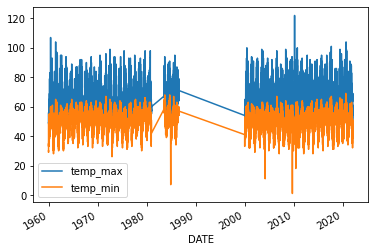

In [22]:
core_weather[['temp_max','temp_min']].plot()

In [23]:
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    364
2022     28
Name: DATE, dtype: int64

The data is missing from 1987 to 1999, and some years such as 1983 and 1986 do not report some data

<AxesSubplot:xlabel='DATE'>

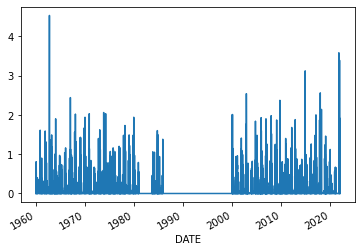

In [24]:
core_weather['precip'].plot()

In [25]:
core_weather.groupby(core_weather.index.year).sum()

precip  temp_max  temp_min
DATE                            
1960   14.01   24135.0   17973.0
1961   13.87   24202.0   17819.0
1962   22.47   23785.0   17880.0
1963   19.11   23470.0   18237.0
1964   16.83   23013.0   18637.0
1965   16.32   23181.0   18715.0
1966   13.11   23680.0   18991.0
1967   23.98   23433.0   18668.0
1968   17.19   23634.0   18859.0
1969   25.70   23276.0   18493.0
1970   25.31   23465.0   18653.0
1971   10.61   22897.0   18084.0
1972   16.27   23262.0   18757.0
1973   29.37   23155.0   18445.0
1974   16.87   23289.0   18400.0
1975   17.54   23174.0   18150.0
1976    8.64   23859.0   18325.0
1977   11.70   23970.0   18884.0
1978   22.57   24112.0   18980.0
1979   23.79   23899.0   19107.0
1980   13.58   24064.0   18855.0
1983    7.13   12658.0   10316.0
1984   16.03   23998.0   18966.0
1985    8.50   23249.0   18461.0
1986    0.00   14112.0   11516.0
2000   21.09   23773.0   17841.0
2001   22.84   23890.0   17895.0
2002   19.12   24025.0   17840.0
2003   11.37   24384.0   18230.0
2004   12.97   24395.0   18213.0
2005   27.37   24012.0   18192.0
2006   22.79   24109.0   17944.0
2007   12.79   23964.0   17884.0
2008   13.86   24136.0   17819.0
2009   14.57   24019.0   17769.0
2010   22.67   24114.0   18363.0
2011   16.06   23873.0   17675.0
2012   22.93   23933.0   17686.0
2013    4.89   24689.0   17917.0
2014   19.62   25159.0   19017.0
2015    8.58   24941.0   18569.0
2016   19.77   24930.0   19102.0
2017   23.34   24901.0   18634.0
2018   16.82   24130.0   17990.0
2019   20.00   24896.0   18782.0
2020    6.42   25934.0   19021.0
2021   20.82   24454.0   18444.0
2022    0.25    1650.0    1186.0

### Training first machine learning model

In [26]:
core_weather['target'] = core_weather.shift(-1)['temp_max']

In [27]:
core_weather

precip  temp_max  temp_min  target
DATE                                          
1960-01-01     0.0      49.0      30.0    49.0
1960-01-02     0.0      49.0      29.0    54.0
1960-01-03     0.0      54.0      35.0    54.0
1960-01-04     0.0      54.0      36.0    55.0
1960-01-05     0.0      55.0      33.0    53.0
...            ...       ...       ...     ...
2022-01-24     0.0      60.0      39.0    57.0
2022-01-25     0.0      57.0      43.0    57.0
2022-01-26     0.0      57.0      41.0    67.0
2022-01-27     0.0      67.0      39.0    64.0
2022-01-28     0.0      64.0      39.0     NaN

[16859 rows x 4 columns]

In [28]:
core_weather = core_weather.iloc[:-1,:].copy()

In [29]:
core_weather

precip  temp_max  temp_min  target
DATE                                          
1960-01-01     0.0      49.0      30.0    49.0
1960-01-02     0.0      49.0      29.0    54.0
1960-01-03     0.0      54.0      35.0    54.0
1960-01-04     0.0      54.0      36.0    55.0
1960-01-05     0.0      55.0      33.0    53.0
...            ...       ...       ...     ...
2022-01-23     0.0      60.0      41.0    60.0
2022-01-24     0.0      60.0      39.0    57.0
2022-01-25     0.0      57.0      43.0    57.0
2022-01-26     0.0      57.0      41.0    67.0
2022-01-27     0.0      67.0      39.0    64.0

[16858 rows x 4 columns]

In [30]:
reg = Ridge(alpha=.1)

In [31]:
predictors = ['precip', 'temp_max', 'temp_min']

In [32]:
train = core_weather.loc[:'2020-12-31']
test = core_weather.loc['2021-01-01':]

In [33]:
reg.fit(train[predictors],train['target'])

Ridge(alpha=0.1)

In [34]:
predictions = reg.predict(test[predictors])

In [35]:
mean_absolute_error(test['target'], predictions)

3.4111699434528306

## Evaluating the model

In [36]:
combined = pd.concat([test['target'], pd.Series(predictions,index=test.index)], axis=1)

In [37]:
combined.columns = ['actual','predictions']

In [38]:
combined

actual  predictions
DATE                           
2021-01-01    57.0    59.806024
2021-01-02    56.0    59.310181
2021-01-03    62.0    58.538685
2021-01-04    59.0    61.531814
2021-01-05    59.0    59.444266
...            ...          ...
2022-01-23    60.0    59.985714
2022-01-24    57.0    59.626333
2022-01-25    57.0    58.181680
2022-01-26    67.0    57.822299
2022-01-27    64.0    64.674302

[391 rows x 2 columns]

<AxesSubplot:xlabel='DATE'>

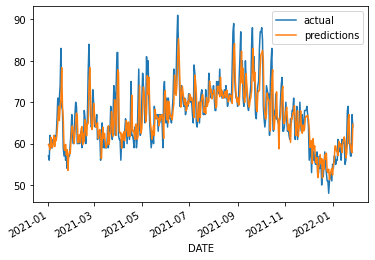

In [39]:
combined.plot()

In [40]:
reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])

In [41]:
def create_predictions (predictors, core_weather, reg):
    train = core_weather.loc[:'2020-12-31']
    test = core_weather.loc['2021-01-01':]
    reg.fit(train[predictors],train['target'])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test['target'], predictions)
    combined = pd.concat([test['target'], pd.Series(predictions,index=test.index)], axis=1)
    combined.columns = ['actual','predictions']
    return error, combined 

**Adding In Rolling Means**

In [43]:
core_weather['month_max'] = core_weather['temp_max'].rolling(30).mean()

In [44]:
core_weather

precip  temp_max  temp_min  target  month_max
DATE                                                     
1960-01-01     0.0      49.0      30.0    49.0        NaN
1960-01-02     0.0      49.0      29.0    54.0        NaN
1960-01-03     0.0      54.0      35.0    54.0        NaN
1960-01-04     0.0      54.0      36.0    55.0        NaN
1960-01-05     0.0      55.0      33.0    53.0        NaN
...            ...       ...       ...     ...        ...
2022-01-23     0.0      60.0      41.0    60.0  56.900000
2022-01-24     0.0      60.0      39.0    57.0  57.066667
2022-01-25     0.0      57.0      43.0    57.0  57.200000
2022-01-26     0.0      57.0      41.0    67.0  57.400000
2022-01-27     0.0      67.0      39.0    64.0  57.933333

[16858 rows x 5 columns]

In [45]:
core_weather['month_day_max'] = core_weather['month_max']/core_weather['temp_max']

In [46]:
core_weather

precip  temp_max  temp_min  target  month_max  month_day_max
DATE                                                                    
1960-01-01     0.0      49.0      30.0    49.0        NaN            NaN
1960-01-02     0.0      49.0      29.0    54.0        NaN            NaN
1960-01-03     0.0      54.0      35.0    54.0        NaN            NaN
1960-01-04     0.0      54.0      36.0    55.0        NaN            NaN
1960-01-05     0.0      55.0      33.0    53.0        NaN            NaN
...            ...       ...       ...     ...        ...            ...
2022-01-23     0.0      60.0      41.0    60.0  56.900000       0.948333
2022-01-24     0.0      60.0      39.0    57.0  57.066667       0.951111
2022-01-25     0.0      57.0      43.0    57.0  57.200000       1.003509
2022-01-26     0.0      57.0      41.0    67.0  57.400000       1.007018
2022-01-27     0.0      67.0      39.0    64.0  57.933333       0.864677

[16858 rows x 6 columns]

In [47]:
core_weather['max_min'] = core_weather['temp_max']/core_weather['temp_min']

In [48]:
predictors = ['precip', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min']

In [49]:
core_weather = core_weather.iloc[30:,:].copy()

In [50]:
error, combined = create_predictions(predictors, core_weather, reg)

In [51]:
error

3.360129746207606

<AxesSubplot:xlabel='DATE'>

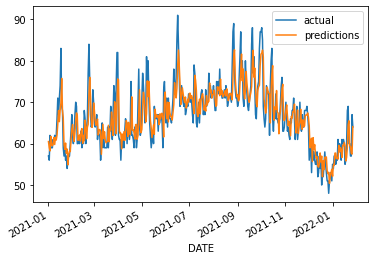

In [52]:
combined.plot()

**Adding in Monthly and Daily avarges**

In [55]:
core_weather['monthly_avg'] = core_weather['temp_max'].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())

In [56]:
core_weather

precip  temp_max  temp_min  target  month_max  month_day_max  \
DATE                                                                       
1960-01-31    0.00      59.0      46.0    62.0  55.566667       0.941808   
1960-02-01    0.81      62.0      51.0    59.0  56.000000       0.903226   
1960-02-02    0.00      59.0      43.0    59.0  56.166667       0.951977   
1960-02-03    0.20      59.0      47.0    60.0  56.333333       0.954802   
1960-02-04    0.16      60.0      42.0    60.0  56.500000       0.941667   
...            ...       ...       ...     ...        ...            ...   
2022-01-23    0.00      60.0      41.0    60.0  56.900000       0.948333   
2022-01-24    0.00      60.0      39.0    57.0  57.066667       0.951111   
2022-01-25    0.00      57.0      43.0    57.0  57.200000       1.003509   
2022-01-26    0.00      57.0      41.0    67.0  57.400000       1.007018   
2022-01-27    0.00      67.0      39.0    64.0  57.933333       0.864677   

             max_min  monthly_avg  
DATE                               
1960-01-31  1.282609    59.000000  
1960-02-01  1.215686    62.000000  
1960-02-02  1.372093    60.500000  
1960-02-03  1.255319    60.000000  
1960-02-04  1.428571    60.000000  
...              ...          ...  
2022-01-23  1.463415    56.781536  
2022-01-24  1.538462    56.783803  
2022-01-25  1.325581    56.783955  
2022-01-26  1.390244    56.784107  
2022-01-27  1.717949    56.791286  

[16828 rows x 8 columns]

In [58]:
core_weather['day_of_year_avg'] = core_weather['temp_max'].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [59]:
core_weather

precip  temp_max  temp_min  target  month_max  month_day_max  \
DATE                                                                       
1960-01-31    0.00      59.0      46.0    62.0  55.566667       0.941808   
1960-02-01    0.81      62.0      51.0    59.0  56.000000       0.903226   
1960-02-02    0.00      59.0      43.0    59.0  56.166667       0.951977   
1960-02-03    0.20      59.0      47.0    60.0  56.333333       0.954802   
1960-02-04    0.16      60.0      42.0    60.0  56.500000       0.941667   
...            ...       ...       ...     ...        ...            ...   
2022-01-23    0.00      60.0      41.0    60.0  56.900000       0.948333   
2022-01-24    0.00      60.0      39.0    57.0  57.066667       0.951111   
2022-01-25    0.00      57.0      43.0    57.0  57.200000       1.003509   
2022-01-26    0.00      57.0      41.0    67.0  57.400000       1.007018   
2022-01-27    0.00      67.0      39.0    64.0  57.933333       0.864677   

             max_min  monthly_avg  day_of_year_avg  
DATE                                                
1960-01-31  1.282609    59.000000        59.000000  
1960-02-01  1.215686    62.000000        62.000000  
1960-02-02  1.372093    60.500000        59.000000  
1960-02-03  1.255319    60.000000        59.000000  
1960-02-04  1.428571    60.000000        60.000000  
...              ...          ...              ...  
2022-01-23  1.463415    56.781536        57.130435  
2022-01-24  1.538462    56.783803        57.239130  
2022-01-25  1.325581    56.783955        57.347826  
2022-01-26  1.390244    56.784107        57.630435  
2022-01-27  1.717949    56.791286        57.826087  

[16828 rows x 9 columns]

In [60]:
predictors = ['precip', 'temp_max', 'temp_min', 'month_max', 'month_day_max', 'max_min','monthly_avg','day_of_year_avg']

In [61]:
error, combined = create_predictions(predictors, core_weather, reg)

In [62]:
error

3.317692658765997

**Running Model Diagnostics**

In [63]:
reg.coef_

array([ -0.90804013,   0.40146278,   0.03114081,   0.33672074,
       -15.97061869,   0.0493612 ,   0.14343362,   0.08006707])

In [64]:
core_weather.corr()['target']

precip            -0.205413
temp_max           0.821650
temp_min           0.596016
target             1.000000
month_max          0.686842
month_day_max     -0.421537
max_min            0.045228
monthly_avg        0.689805
day_of_year_avg    0.712334
Name: target, dtype: float64

In [65]:
combined['diff'] = (combined['actual']-combined['predictions']).abs()

In [66]:
combined.sort_values('diff', ascending=False).head()

actual  predictions       diff
DATE                                      
2021-01-17    83.0    68.585837  14.414163
2021-05-07    81.0    67.774432  13.225568
2021-04-01    62.0    75.178360  13.178360
2021-02-22    84.0    71.168844  12.831156
2021-10-16    66.0    78.823197  12.823197